# A pool Car rental Management system

A person who has a plan to start a car rental business system in Goa, since Goa is tourist place, where most of peoples are comes here to enjoy their holiday from various regions of India and across the globe. For that the businessperson is approaching you to develop a Car Rental Management System in Python using Object Oriented Programming (OOP). This project should be seen easy design for the customer to access the features as hassle free. Also, administrator access to be simple and dynamic in nature to update the key attributes of the functionality in this project.

The customer should find the following information from this project as given below,

    The total number of cars.

    Variety of cars (basic, mid-range, luxury).

    Should display the car manufacturer details.

    Tariff of each segment of car variety.

    The availability of the cars with respect to the different segment.

    Duration of the car rental must be displayed.

    Terms and conditions are clearly mentioned.

    Car age, kilometre driven, last service date, service history.

The car rental businessman is seeking below features,

    Dynamically update feature should be available.

    Adding new car to the existing list.

    Removing the car from the list if the car is not good condition.

    If the car reaches the threshold distance, it should be removed from the carpool to get servicing.

    Rental of the car should be maintained and calculated dynamically.

    Customer driven extra kilometre; alerts should be given.

If anything needs to be added for effectiveness of the project, you can do it.

In [12]:
from datetime import date, datetime, timedelta
class Car:
    def __init__(self, car_id, manufacturer, segment, tariff, mileage, last_service_date):
        self.car_id = car_id
        self.manufacturer = manufacturer
        self.segment = segment
        self.tariff = tariff
        self.mileage = mileage
        self.last_service_date = last_service_date
        self.available = True
        self.rental_start_date = None

    def rent(self, start_date):
        if self.available:
            self.available = False
            self.rental_start_date = start_date
            return True
        else:
            return False

    def return_car(self, return_date):
        if not self.available:
            self.available = True
            rental_duration = (return_date - self.rental_start_date).days
            return rental_duration

    def is_service_due(self, threshold_distance):
        return self.mileage >= threshold_distance

    def is_service_overdue(self, service_interval, current_date):
        last_service = date.fromisoformat(self.last_service_date)
        days_since_last_service = (current_date - last_service).days
        return days_since_last_service > service_interval

    def car_age(self, current_date):
        purchase_date = date.fromisoformat(self.last_service_date)
        car_age = (current_date - purchase_date).days
        return car_age

    def service_history(self):
        service_history = []
        today = date.today()
        last_service = date.fromisoformat(self.last_service_date)
        service_interval = (today - last_service).days
        for _ in range(service_interval):
            last_service += timedelta(days=1)
            if last_service.day == 1:
                service_history.append(last_service)
        return service_history


class CarRentalSystem:
    def __init__(self):
        self.cars = []

    def add_car(self, car):
        self.cars.append(car)

    def remove_car(self, car_id):
        self.cars = [car for car in self.cars if car.car_id != car_id]

    def list_available_cars(self, segment=None):
        if segment:
            return [car for car in self.cars if car.available and car.segment == segment]
        else:
            return [car for car in self.cars if car.available]

    def rent_car(self, car_id, start_date):
        for car in self.cars:
            if car.car_id == car_id:
                if car.rent(start_date):
                    return car
                else:
                    return None

    def return_car(self, car_id, return_date):
        for car in self.cars:
            if car.car_id == car_id:
                rental_duration = car.return_car(return_date)
                if rental_duration is not None:
                    return rental_duration

    def calculate_rental_cost(self, car_id, days):
        for car in self.cars:
            if car.car_id == car_id:
                return car.tariff * days

    def update_service_details(self, car_id, mileage, last_service_date):
        for car in self.cars:
            if car.car_id == car_id:
                car.mileage = mileage
                car.last_service_date = last_service_date

    def service_due_cars(self, threshold_distance):
        return [car for car in self.cars if car.is_service_due(threshold_distance)]

    def service_overdue_cars(self, service_interval, current_date):
        return [car for car in self.cars if car.is_service_overdue(service_interval, current_date)]


def display_menu():
    print("\nMenu:")
    print("1. Rent a car")
    print("2. Return a car")
    print("3. List available cars")
    print("4. Calculate rental cost")
    print("5. Administrator: Update service details")
    print("6. Administrator: Add a new car")
    print("7. Administrator: Remove a car")
    print("8. Service Due Cars")
    print("9. Service Overdue Cars")
    print("10. Car Details")
    print("11. Terms and Conditions")
    print("12. Exit")


def list_car_details(car):
    print(f"Manufacturer: {car.manufacturer}")
    print(f"Segment: {car.segment}")
    print(f"Tariff: {car.tariff} per day")
    print(f"Mileage: {car.mileage} km")
    print(f"Last Service Date: {car.last_service_date}")
    print(f"Car ID: {car.car_id}")
    print(f"Car Age: {car.car_age(date.today())} days")
    print(f"Kilometers Driven: {car.mileage} km")
    print(f"Service History: {', '.join(map(str, car.service_history()))}")


def display_terms_and_conditions():
    print("\nTerms and Conditions:")
    print("1. Rental rates may vary based on car segment and duration of rental.")
    print("2. Customers are responsible for any damage to the rented car during the rental period.")
    print("3. Cars must be returned in the same condition as when rented, with a full tank of fuel.")
    print("4. Additional charges may apply for extra kilometers driven beyond the rental agreement.")
    print("5. All rentals are subject to availability.")
    print("6. The rental company is not responsible for personal belongings left in the car.")
    print("7. Please obey all traffic laws and regulations while using the rented car.")
    print("8. Any violation of these terms and conditions may result in additional charges or termination of the rental agreement.")


car_rental_system = CarRentalSystem()

car1 = Car(1, "Toyota", "Basic", 50, 20000, "2022-01-15")
car2 = Car(2, "BMW", "Luxury", 100, 15000, "2022-03-20")
car3 = Car(3, "Honda", "Mid-range", 75, 18000, "2022-02-10")

car_rental_system.add_car(car1)
car_rental_system.add_car(car2)
car_rental_system.add_car(car3)

while True:
    display_menu()
    choice = input("Enter your choice: ")

    if choice == "1":
        car_id = int(input("Enter the car ID you want to rent: "))
        start_date = datetime.strptime(input("Enter the rental start date (YYYY-MM-DD): "), "%Y-%m-%d").date()
        rented_car = car_rental_system.rent_car(car_id, start_date)
        if rented_car:
            print(f"Rented car: {rented_car.manufacturer}")
        else:
            print("Car not available")

    elif choice == "2":
        car_id = int(input("Enter the car ID you want to return: "))
        return_date = datetime.strptime(input("Enter the return date (YYYY-MM-DD): "), "%Y-%m-%d").date()
        rental_duration = car_rental_system.return_car(car_id, return_date)
        if rental_duration is not None:
            print(f"Car returned successfully. Rental duration: {rental_duration} days")
        else:
            print("Car not rented or already returned")

    elif choice == "3":
        segment = input("Enter the car segment (Basic/Luxury/Mid-range): ")
        available_cars = car_rental_system.list_available_cars(segment)
        if available_cars:
            print(f"Available {segment} cars:")
            for car in available_cars:
                list_car_details(car)
        else:
             print("No cars available in this segment.")

    elif choice == "4":
        car_id = int(input("Enter the car ID for rental cost calculation: "))
        days = int(input("Enter the number of days for rental: "))
        rental_cost = car_rental_system.calculate_rental_cost(car_id, days)
        print(f"Rental cost: {rental_cost}")

    elif choice == "5":
        if input("Enter admin password: ") == "adminpassword":
            car_id = int(input("Enter the car ID to update service details: "))
            mileage = int(input("Enter the new mileage: "))
            last_service_date = input("Enter the last service date (YYYY-MM-DD): ")
            car_rental_system.update_service_details(car_id, mileage, last_service_date)
            print("Service details updated successfully.")
        else:
            print("Incorrect password. Access denied.")
    elif choice == "6":
        if input("Enter admin password: ") == "adminpassword":
            car_id = len(car_rental_system.cars) + 1
            manufacturer = input("Enter the car manufacturer: ")
            segment = input("Enter the car segment (Basic/Luxury/Mid-range): ")
            tariff = float(input("Enter the car tariff per day: "))
            mileage = int(input("Enter the car mileage: "))
            last_service_date = input("Enter the last service date (YYYY-MM-DD): ")
            new_car = Car(car_id, manufacturer, segment, tariff, mileage, last_service_date)
            car_rental_system.add_car(new_car)
            print("New car added successfully.")
        else:
            print("Incorrect password. Access denied.")
    elif choice == "7":
        if input("Enter admin password: ") == "adminpassword":
            car_id = int(input("Enter the car ID to remove: "))
            car_rental_system.remove_car(car_id)
            print("Car removed successfully.")
        else:
            print("Incorrect password. Access denied.")

    elif choice == "8":
        service_due_cars = car_rental_system.service_due_cars(30000)  # Adjust the threshold distance as needed
        if service_due_cars:
            print("Service Due Cars:")
            for car in service_due_cars:
                list_car_details(car)
        else:
            print("No cars are due for service.")

    elif choice == "9":
        current_date = date.today()
        service_overdue_cars = car_rental_system.service_overdue_cars(365, current_date)  # Adjust the service interval as needed
        if service_overdue_cars:
            print("Service Overdue Cars:")
            for car in service_overdue_cars:
                list_car_details(car)
        else:
            print("No cars are overdue for service.")

    elif choice == "10":
        car_id = int(input("Enter the car ID to view details: "))
        for car in car_rental_system.cars:
            if car.car_id == car_id:
                list_car_details(car)
                break

    elif choice == "11":
        display_terms_and_conditions()

    elif choice == "12":
        print("Thank you for using the Car Rental Management System. Goodbye!")
        break

    else:
        print("Invalid choice. Please select a valid option.")


Menu:
1. Rent a car
2. Return a car
3. List available cars
4. Calculate rental cost
5. Administrator: Update service details
6. Administrator: Add a new car
7. Administrator: Remove a car
8. Service Due Cars
9. Service Overdue Cars
10. Car Details
11. Terms and Conditions
12. Exit
Enter your choice: 1
Enter the car ID you want to rent: 1
Enter the rental start date (YYYY-MM-DD): 2023-09-24
Rented car: Toyota

Menu:
1. Rent a car
2. Return a car
3. List available cars
4. Calculate rental cost
5. Administrator: Update service details
6. Administrator: Add a new car
7. Administrator: Remove a car
8. Service Due Cars
9. Service Overdue Cars
10. Car Details
11. Terms and Conditions
12. Exit
Enter your choice: 1
Enter the car ID you want to rent: 2
Enter the rental start date (YYYY-MM-DD): 2023-09-24
Rented car: BMW

Menu:
1. Rent a car
2. Return a car
3. List available cars
4. Calculate rental cost
5. Administrator: Update service details
6. Administrator: Add a new car
7. Administrator: R

# Railway Management System

• Problem Statement:

The problem statement is to create the Railway Management System that develops a user-friendly software application that facilitates various functionalities related to railway ticketing and management. The system should allow users to book tickets, cancel booking, check fares, view their bookings, and display available trains.

• Case Study:

Imagine a scenario where a railway company needs a modern and efficient system to handle their ticketing and management operations. The current manual process is time-consuming, prone to errors, and lacks flexibility. They want to automate these processes and provide a convenient platform for their customers to book tickets, check fares, and manage their reservations easily.

• Data Analysis Part:

The data analysis part of the Railway Management System involves analysing the data collected from various sources, such as customer bookings, train schedules, and fare information. This analysis helps in gaining insights into customer preferences, popular routes etc.

• Objective:

The primary objective of the Railway Management System is to streamline and automate the ticketing and management processes for both the railway company and its customers. The specific objectives include:

-> Ticket Booking: Allow users to book tickets conveniently by selecting the desired train, class, and travel date. The system should validate the availability of seats and provide a confirmation for successful bookings.

-> Reservation Cancellation: Provide users with the option to cancel their booked tickets if required. The system should handle cancellation requests, update seat availability, and process refunds if applicable.

-> Fare Checking: Enable users to check fares for different trains, classes, and routes before making a booking. The system should fetch the fare details from the database and display them accurately.

-> Booking History: Allow users to view their booking history, including details such as train name, departure/arrival times, class, and booking status.

This feature helps users keep track of their travel history.

-> Train Availability: Provide users with an up-to-date list of available trains based on the selected source and destination. The system should display relevant details like train name, departure/arrival times, and seat availability.

-> Menu: Display a menu to users, showcasing the available options and functionalities of the system.

-> Exit: Allow users to exit the program gracefully when they have completed their tasks.

In [19]:
import mysql.connector
import datetime

class Train:
    def __init__(self, train_id, name, source, destination, departure_time, arrival_time, available_seats):
        self.train_id = train_id
        self.name = name
        self.source = source
        self.destination = destination
        self.departure_time = departure_time
        self.arrival_time = arrival_time
        self.available_seats = available_seats

class Fare:
    def __init__(self, train_id, class_type, fare_amount):
        self.train_id = train_id
        self.class_type = class_type
        self.fare_amount = fare_amount

class Booking:
    def __init__(self, booking_id, train, user_name, seat_number, travel_date, class_type):
        self.booking_id = booking_id
        self.train = train
        self.user_name = user_name
        self.seat_number = seat_number
        self.travel_date = travel_date
        self.class_type = class_type
        self.booking_status = "Confirmed"

class RailwayManagementSystem:
    def __init__(self):
        self.db = mysql.connector.connect(
            host="127.0.0.1",
            user="root",
            password="Sirisha@200027",
            database="railwaysystem"
        )
        self.cursor = self.db.cursor()
        self.booking_counter = 1

    def add_train(self, train):
        query = "INSERT INTO trains (name, source, destination, departure_time, arrival_time, available_seats) VALUES (%s, %s, %s, %s, %s, %s)"
        values = (train.name, train.source, train.destination, train.departure_time, train.arrival_time, train.available_seats)
        self.cursor.execute(query, values)
        self.db.commit()

    def add_fare(self, fare):
        query = "INSERT INTO fares (train_id, class_type, fare_amount) VALUES (%s, %s, %s)"
        values = (fare.train_id, fare.class_type, fare.fare_amount)
        self.cursor.execute(query, values)
        self.db.commit()

    def book_ticket(self, train_id, user_name, travel_date, class_type):
        # Fetch train details from the database
        query = "SELECT name, available_seats FROM trains WHERE train_id = %s"
        self.cursor.execute(query, (train_id,))
        train_data = self.cursor.fetchone()

        if not train_data:
            return None, "Train not found."

        train_name, available_seats = train_data

        # Check if class_type is valid
        if class_type not in ["1A", "2A", "3A", "SL"]:
            return None, "Invalid class type."

        # Check if there are available seats
        if available_seats <= 0:
            return None, "No available seats on this train."

        # Perform booking
        query = "INSERT INTO bookings (train_id, user_name, travel_date, class_type) VALUES (%s, %s, %s, %s)"
        values = (train_id, user_name, travel_date, class_type)
        self.cursor.execute(query, values)
        self.db.commit()

        # Decrease available seats
        query = "UPDATE trains SET available_seats = available_seats - 1 WHERE train_id = %s"
        self.cursor.execute(query, (train_id,))
        self.db.commit()

        return Booking(self.booking_counter, Train(train_id, train_name, "", "", "", "", available_seats - 1), user_name, None, travel_date, class_type), "Booking Successful."
    
    def cancel_ticket(self, booking_id):
        # Fetch booking details from the database
        query = "SELECT train_id, class_type FROM bookings WHERE booking_id = %s"
        self.cursor.execute(query, (booking_id,))
        booking_data = self.cursor.fetchone()

        if not booking_data:
            return "Booking not found."

        train_id, class_type = booking_data

        # Increase available seats
        query = "UPDATE trains SET available_seats = available_seats + 1 WHERE train_id = %s"
        self.cursor.execute(query, (train_id,))
        self.db.commit()

        # Delete the booking
        query = "DELETE FROM bookings WHERE booking_id = %s"
        self.cursor.execute(query, (booking_id,))
        self.db.commit()

        return "Booking canceled successfully."

    def get_train_details(self, train_id):
        # Fetch train details from the database
        query = "SELECT name, source, destination, departure_time, arrival_time, available_seats FROM trains WHERE train_id = %s"
        self.cursor.execute(query, (train_id,))
        train_data = self.cursor.fetchone()

        if not train_data:
            return None

        name, source, destination, departure_time, arrival_time, available_seats = train_data
        return Train(train_id, name, source, destination, departure_time, arrival_time, available_seats)

    def get_booking_history(self, user_name):
        # Fetch booking history from the database
        query = "SELECT booking_id, train_id, seat_number, travel_date, class_type, booking_status FROM bookings WHERE user_name = %s"
        self.cursor.execute(query, (user_name,))
        booking_data = self.cursor.fetchall()

        if not booking_data:
            return []

        booking_history = []
        for booking_id, train_id, seat_number, travel_date, class_type, booking_status in booking_data:
            train = self.get_train_details(train_id)
            booking_history.append(Booking(booking_id, train, user_name, seat_number, travel_date, class_type))

        return booking_history

    def display_available_trains(self, source, destination):
        # Fetch available trains from the database
        query = "SELECT train_id, name, departure_time, arrival_time, available_seats FROM trains WHERE source = %s AND destination = %s AND available_seats > 0"
        self.cursor.execute(query, (source, destination))
        train_data = self.cursor.fetchall()

        available_trains = []
        for train_id, name, departure_time, arrival_time, available_seats in train_data:
            available_trains.append(Train(train_id, name, source, destination, departure_time, arrival_time, available_seats))

        return available_trains

    def check_fare(self, train_id, class_type):
        # Fetch fare details from the database
        query = "SELECT fare_amount FROM fares WHERE train_id = %s AND class_type = %s"
        self.cursor.execute(query, (train_id, class_type))
        fare_data = self.cursor.fetchone()

        if not fare_data:
            return None

        return fare_data[0]

def main():
    railway_system = RailwayManagementSystem()

    while True:
        print("\nRailway Management System Menu:")
        print("1. Book a Ticket")
        print("2. Cancel a Ticket")
        print("3. Get Train Details")
        print("4. View Booking History")
        print("5. Display Available Trains")
        print("6. Check Fare")
        print("7. Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            train_id = int(input("Enter the Train ID: "))
            user_name = input("Enter your Name: ")
            travel_date = datetime.datetime.strptime(input("Enter the Travel Date (YYYY-MM-DD): "), "%Y-%m-%d").date()
            class_type = input("Enter the Class Type (1A, 2A, 3A, SL): ")
            booking, message = railway_system.book_ticket(train_id, user_name, travel_date, class_type)
            if booking:
                print(f"{message} Booking ID: {booking.booking_id}")
            else:
                print(message)

        elif choice == "2":
            booking_id = int(input("Enter Booking ID to cancel: "))
            message = railway_system.cancel_ticket(booking_id)
            print(message)

        elif choice == "3":
            train_id = int(input("Enter Train ID to get details: "))
            train = railway_system.get_train_details(train_id)
            if train:
                print(f"Train Details:\nName: {train.name}\nSource: {train.source}\nDestination: {train.destination}\nDeparture Time: {train.departure_time}\nArrival Time: {train.arrival_time}\nAvailable Seats: {train.available_seats}")
            else:
                print("Train not found.")

        elif choice == "4":
            user_name = input("Enter your Name to view booking history: ")
            bookings = railway_system.get_booking_history(user_name)
            if bookings:
                print("Booking History:")
                for booking in bookings:
                    print(f"Booking ID: {booking.booking_id}, Train: {booking.train.name}, Departure Time: {booking.train.departure_time}, Arrival Time: {booking.train.arrival_time}, Class: {booking.class_type}, Status: {booking.booking_status}")
            else:
                print("No booking history found for the user.")

        elif choice == "5":
            source = input("Enter Source City: ")
            destination = input("Enter Destination City: ")
            available_trains = railway_system.display_available_trains(source, destination)
            if available_trains:
                print("Available Trains:")
                for train in available_trains:
                    print(f"Train Name: {train.name}, Departure Time: {train.departure_time}, Arrival Time: {train.arrival_time}, Available Seats: {train.available_seats}")
            else:
                print("No available trains for the selected route.")

        elif choice == "6":
            train_id = int(input("Enter Train ID to check fare: "))
            class_type = input("Enter Class Type (1A, 2A, 3A, SL): ")
            fare = railway_system.check_fare(train_id, class_type)
            if fare is not None:
                print(f"Fare for Train ID {train_id}, Class {class_type}: Rs. {fare}")
            else:
                print("Fare details not found for the selected train and class.")

        elif choice == "7":
            print("Thank you for using the Railway Management System. Goodbye!")
            break

        else:
            print("Invalid choice. Please select a valid option.")

main()


Railway Management System Menu:
1. Book a Ticket
2. Cancel a Ticket
3. Get Train Details
4. View Booking History
5. Display Available Trains
6. Check Fare
7. Exit
Enter your choice: 1
Enter the Train ID: 1
Enter your Name: siri
Enter the Travel Date (YYYY-MM-DD): 2023-09-27
Enter the Class Type (1A, 2A, 3A, SL): 1A
Booking Successful. Booking ID: 1

Railway Management System Menu:
1. Book a Ticket
2. Cancel a Ticket
3. Get Train Details
4. View Booking History
5. Display Available Trains
6. Check Fare
7. Exit
Enter your choice: 1
Enter the Train ID: 2
Enter your Name: sirisha
Enter the Travel Date (YYYY-MM-DD): 2023-09-28
Enter the Class Type (1A, 2A, 3A, SL): SL
Booking Successful. Booking ID: 1

Railway Management System Menu:
1. Book a Ticket
2. Cancel a Ticket
3. Get Train Details
4. View Booking History
5. Display Available Trains
6. Check Fare
7. Exit
Enter your choice: 2
Enter Booking ID to cancel: 2
Booking not found.

Railway Management System Menu:
1. Book a Ticket
2. Cancel

# YouTube Video Statistics

Abstract:

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, to determine the year's top- trending videos, YouTube uses a combination of factors including measuring user's interactions (number of views, shares, comments, and likes). Note that they're not the most-viewed videos overall for the calendar year.

Problem Statement:
Read the YouTube data and perform exploratory data analysis.

Dataset Information:

This dataset is the daily record from the top trending YouTube videos. Top 200 trending videos of a given day. Original Data was collected during 14th November 2017 & 5th March 2018(though, data for January 10th & 11th of 2017 is missing) Original dataset was collected by YouTube API.

Variable Description:

Column                                  Description

Video_id              -     Unique Identity which tells the video id of each subscribed video
Category_id           -     Unique number assigned to each category of the video
Channel_title         -     Unique number assigned to each category of the video
Subscriber            -     Count of all subscribers for the respective video
Title                 -     Title of the video
Tags                  -     Tags are descriptive keywords you can add to your video to help viewers find your content
Description           -     Description of the respective video
Trend_day_count       -     Trending videos count for respective video
Tag_count             -     Tag count for the respective video
Trend_tag_count       -     Tag count for respective trending video
Comment_count         -     Count of comments for particular video
Comment_disabled      -     It represents the boolean value. True represents comments are enabled and False disabled represents                             comments are disabled
Like_dislike_disabled -     It represents the boolean value. True represents comments are enabled and False disabled represents                             comments are disabled.

Likes                 -     Number of likes for particular video
Dislikes              -     Number of dislikes for particular video
Tag appeared in title -     It represents the boolean value. True represents that the respective tag has appeared in a                                     particular video. False represents that the respective tag has not appeared in particular video.
Views                 -     Target variable. Number of views for particular video.

     Video_id category_id          channel_title  subscriber  \
0   HDR9SQc79          22           CaseyNeistat   9086142.0   
1  KNH52UF?48          24        LastWeekTonight   5937292.0   
2  QTW28IRG36          23           Rudy Mancuso   4191209.0   
3  MGL76WI]26          24  Good Mythical Morning  13186408.0   
4  TWP93KXT70          24               nigahiga  20563106.0   

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  \
0                                    SHANtell martin   
1  last week tonight trump presidency|last week t...   
2  racist superman|rudy|mancuso|king|bach|racist|...   
3  rhett and link|gmm|good mythical morning|rhett...  

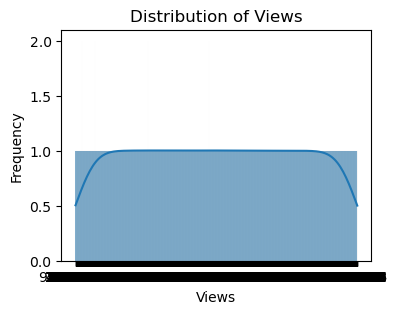

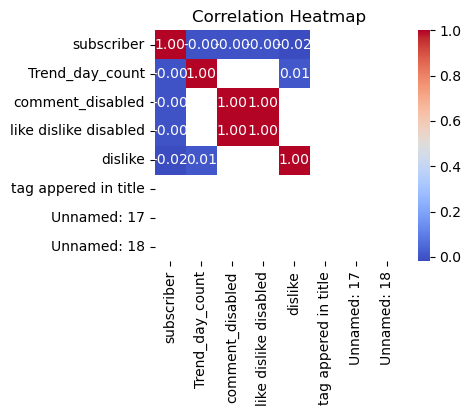

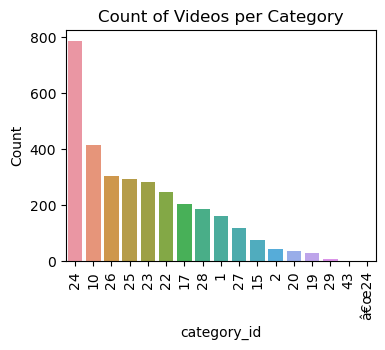

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Youtube.csv")

# Explore the dataset
print(df.head())  # Display the first few rows to understand the data structure
print(df.info())  # Get information about data types and missing values

# Summary statistics
print(df.describe())


# Visualize data
# Example: Distribution of views
plt.figure(figsize=(4, 3))
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()
corr_matrix = df.corr(numeric_only=True)
# Example: Correlation heatmap
#correlation_matrix = df.corr().copy()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example: Count of videos per category
category_counts = df['category_id'].value_counts()
plt.figure(figsize=(4,3))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Count of Videos per Category")
plt.xlabel("category_id")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()